# Insurance Premium Regression Analysis

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Uploading the dataset**

In [2]:
# reading the dataset
insdf = pd.read_csv('DS_C12_S1_Regression_Insurance_Data_Project.csv')

In [3]:
# data exploration

In [4]:
insdf

,age,gender,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830
1334,18,female,31.920,OB1,0,no,northeast,2205.98080
1335,18,female,36.850,OB2,0,no,southeast,1629.83350
1336,21,female,25.800,PREO,0,no,southwest,2007.94500


In [5]:
insdf.shape

(1338, 8)

In [6]:
# 1338 rows and 8 columns

In [7]:
insdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [8]:
# checking for null values

In [9]:
insdf.isnull().sum()

age         0
gender      0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# null values detected in classif  

In [11]:
insdf['classif'].fillna(insdf['classif'].mode()[0],inplace=True)

In [12]:
insdf.isnull().sum()

age         0
gender      0
bmi         0
classif     0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
#no null values

In [14]:
#checking for duplicates
insdf.duplicated().sum()

1

In [15]:
# 1 duplicate entry found
# removing the duplicate entry by dropping
insdf.drop_duplicates(keep='first',inplace=True)

In [16]:
# checking again
insdf.duplicated().sum()

0

In [17]:
# confirmed no duplicates

In [18]:
insdf.shape

(1337, 8)

In [19]:
# new demension 
# 1337 rows and 8 columns

In [20]:
# statistical description
insdf.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.148841,30.663452,1.095737,13279.121487
std,14.954106,6.100468,1.205571,12110.359656
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,190.000000,53.130000,5.000000,63770.428010


In [21]:
# For age col. the maximum is 190 , mean 39.14 of 1337 recods
# bmi , maximum is 53 , minimum is 15 and the mean is 30.66 for 1337 records.
# children , max is 5 and min is 0 in 1337 records
# charges , maximum charge is 63770 and min is 1121 with a mean of 13279.12 for 1337 records.

# EDA

In [24]:
# using histogram and boxplot , to see the frequency and the presence of outliers in the data

In [25]:
def hist_box(*s):
    for col in s:
        fig,ax=plt.subplots(1,2,figsize=(15,4))
        ax=ax.ravel()
        sns.histplot(x=col,bins=10,ax=ax[0],data=insdf)
        ax[0].set_title(f"distribution of {col} using histogram")
        ax[0].set_xlabel(f"{col}")
        ax[0].set_ylabel(f"frequency of {col}")
        
        
        sns.boxplot(y=insdf[col],ax=ax[1])
        ax[1].set_title(f"distribution using boxplot of {col}")

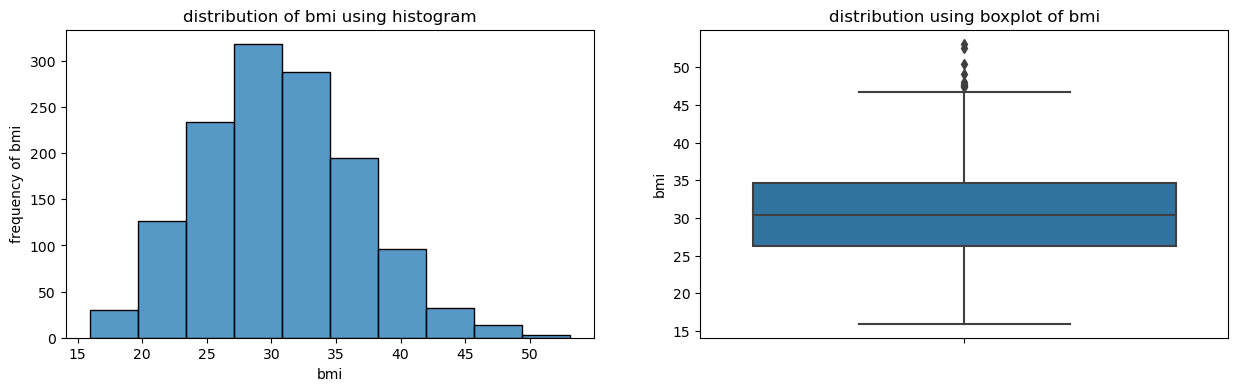

In [26]:
hist_box('bmi')

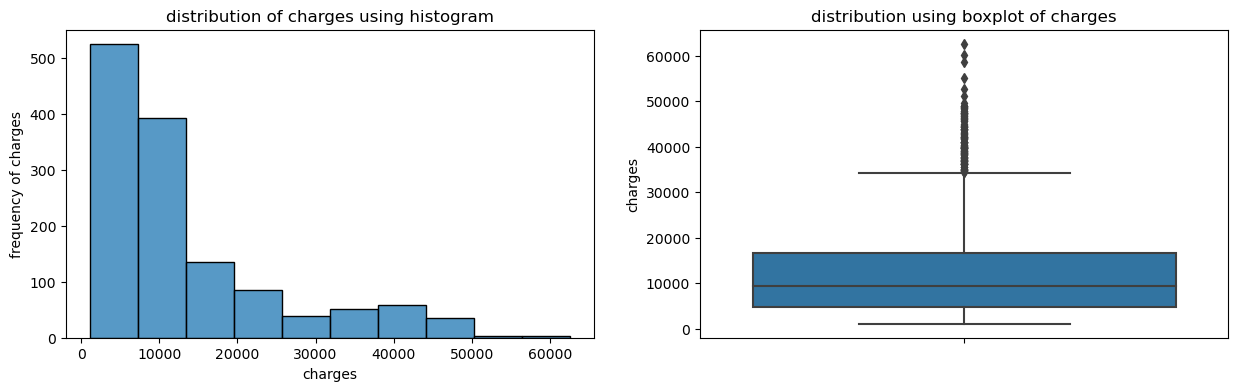

In [37]:
hist_box('charges')

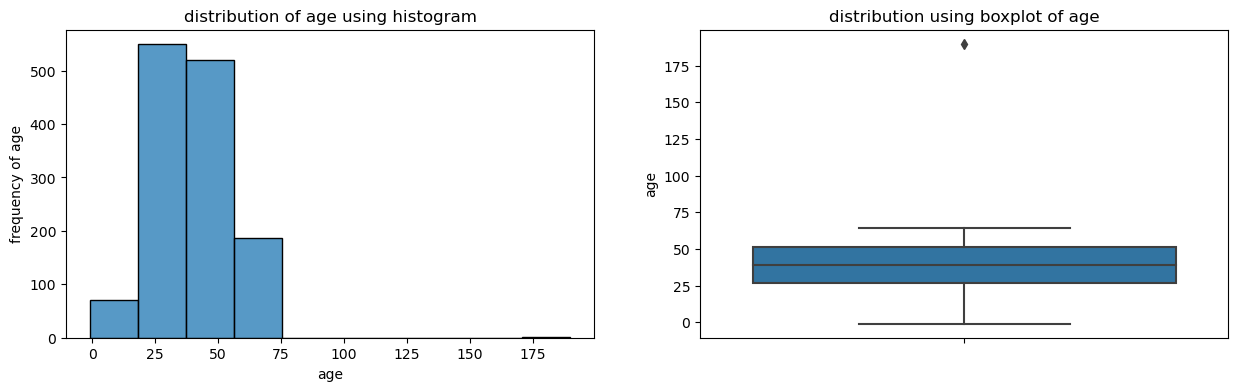

In [38]:
hist_box('age')

In [27]:
insdf.age.min()

-58

In [28]:
# age can't be negative so selecting above -1
insdf=insdf[insdf.age>-1]

In [29]:
# age zero means just born , not possible
insdf=insdf[insdf.age!=0]

In [30]:
# age 190 , also no
insdf=insdf[insdf.age<190]

In [31]:
insdf.age.min()

18

In [32]:
insdf.age.max()

64

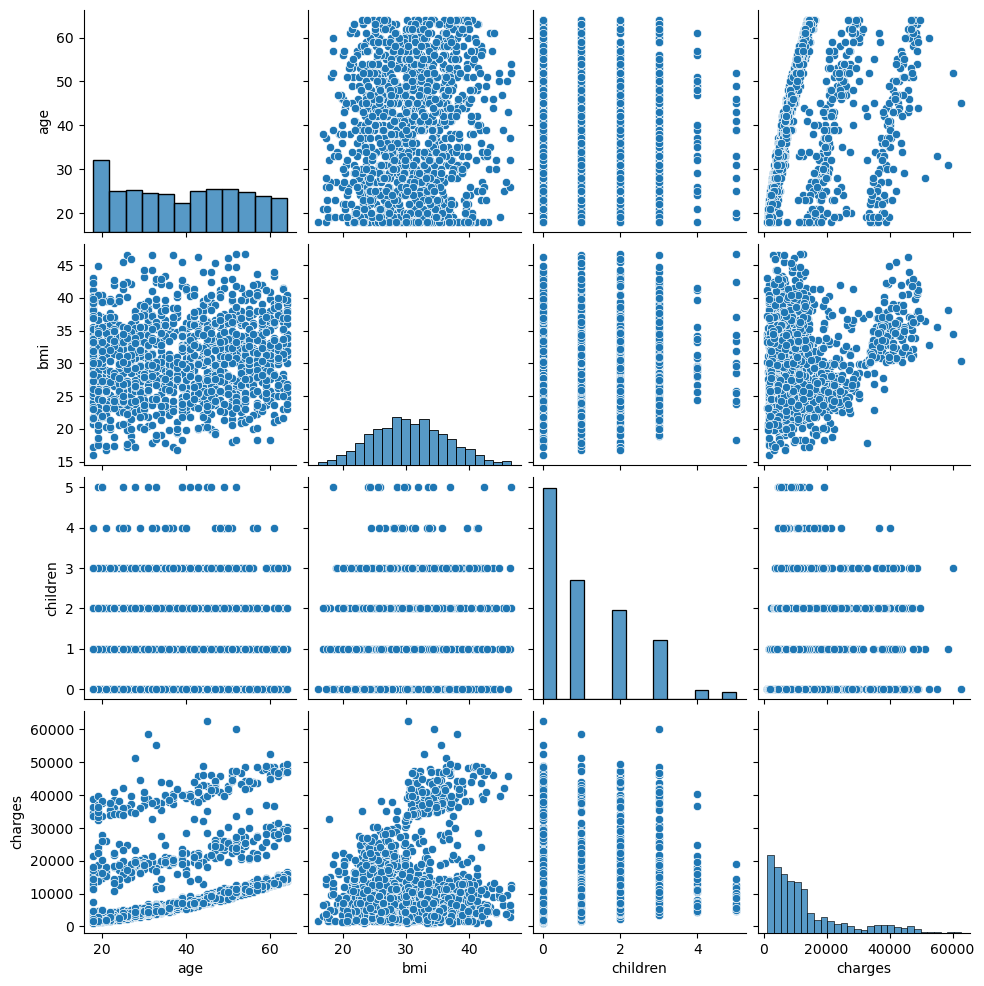

In [50]:
sns.pairplot(insdf)

In [33]:
# shows the relationship between all the columns

In [34]:
# # creating a new column of category and adding it to the main dataframe for age 
insdf['age_cat']=pd.cut(insdf.age,bins=3,labels=['Young','Middle','Old'])

In [35]:
insdf

,age,gender,bmi,classif,children,smoker,region,charges,age_cat
0,19,female,27.90,PREO,0,yes,southwest,16884.9240,Young
1,18,male,33.77,OB1,1,no,southeast,1725.5523,Young
2,28,male,33.00,OB1,3,no,southeast,4449.4620,Young
4,32,male,28.88,PREO,0,no,northwest,3866.8552,Young
5,31,female,25.74,PREO,0,no,southeast,3756.6216,Young
...,...,...,...,...,...,...,...,...,...
1332,52,female,44.70,OB3,3,no,southwest,11411.6850,Old
1333,50,male,30.97,OB1,3,no,northwest,10600.5483,Old
1334,18,female,31.92,OB1,0,no,northeast,2205.9808,Young
1335,18,female,36.85,OB2,0,no,southeast,1629.8335,Young


In [36]:
# dropping the age column

In [37]:
ins_df =insdf.copy()

In [38]:
ins_df.drop('age',axis=1,inplace=True)

In [39]:
ins_df

,gender,bmi,classif,children,smoker,region,charges,age_cat
0,female,27.90,PREO,0,yes,southwest,16884.9240,Young
1,male,33.77,OB1,1,no,southeast,1725.5523,Young
2,male,33.00,OB1,3,no,southeast,4449.4620,Young
4,male,28.88,PREO,0,no,northwest,3866.8552,Young
5,female,25.74,PREO,0,no,southeast,3756.6216,Young
...,...,...,...,...,...,...,...,...
1332,female,44.70,OB3,3,no,southwest,11411.6850,Old
1333,male,30.97,OB1,3,no,northwest,10600.5483,Old
1334,female,31.92,OB1,0,no,northeast,2205.9808,Young
1335,female,36.85,OB2,0,no,southeast,1629.8335,Young


In [58]:
# seeing the relationship through visualization

Text(0.5, 1.0, 'Age wise Charges')

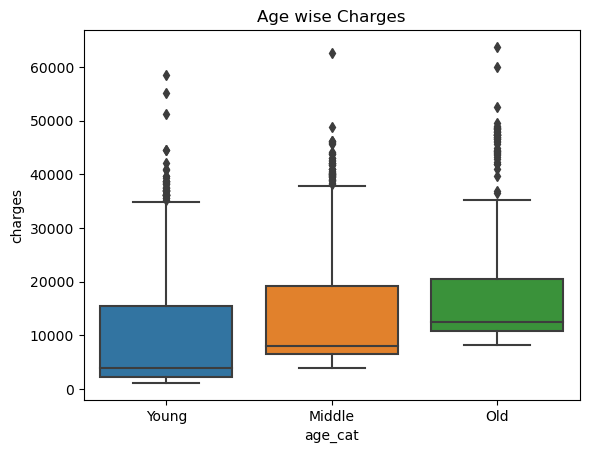

In [42]:
sns.boxplot(y='charges',x='age_cat',data=ins_df)
plt.title('Age wise Charges')
# box plot , 

In [182]:
# old Age Customers have more charges.

In [62]:
# more are of young age groups in the dataset

Text(0.5, 1.0, 'Region wise Charges')

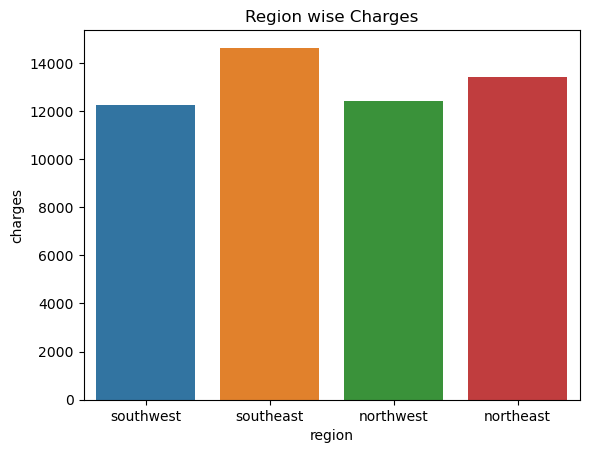

In [63]:
sns.barplot(x='region',y='charges',data=ins_df,ci=None)
plt.title('Region wise Charges')

In [64]:
# northeast has the highest charges

([<matplotlib.patches.Wedge at 0x22f5c3dc550>,
 [Text(-0.01305010281531338, 1.099922585828889, 'male'),
  Text(0.013050102815313734, -1.099922585828889, 'female')],
 [Text(-0.007118237899261843, 0.5999577740884848, '50.4%'),
  Text(0.007118237899262036, -0.5999577740884848, '49.6%')])

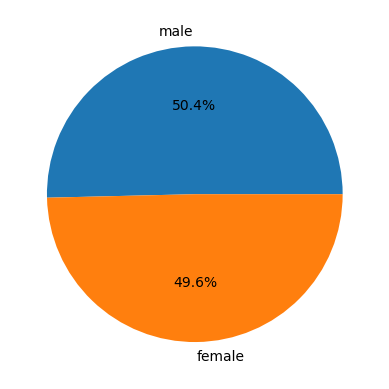

In [65]:
per=ins_df['gender'].value_counts(normalize=True)*100
plt.pie(per.values,labels=per.index,autopct="%1.1f%%")

In [66]:
# 51.3% of the Females are charged more than the males

Text(0.5, 1.0, 'Charges wise health classification')

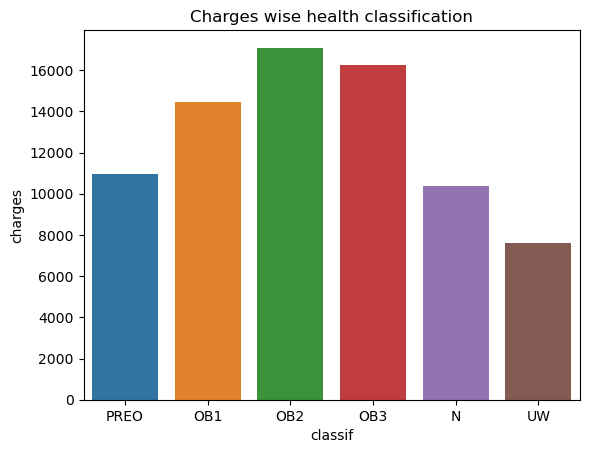

In [67]:
sns.barplot(x='classif',y='charges',data=ins_df,ci=None)
plt.title('Charges wise health classification')

In [68]:
# PREO healthclassification on bmi value have the most charges

In [70]:
# Classification OB3 has the most bmi value

Text(0.5, 1.0, 'Children wise Charges')

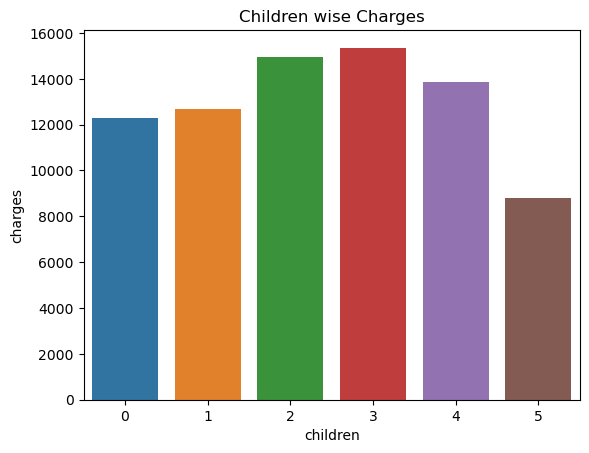

In [71]:
sns.barplot(x='children',y='charges',data=ins_df,ci=None)
plt.title('Children wise Charges')

In [72]:
# Customers with 4 children have the highest charges

In [73]:
# Features like Age, health classigication , bmi and children seem to have an affect on charges 

In [75]:
# changing object type to category 

In [43]:
cat_col = ['gender','classif','smoker','region','age_cat','children']
ins_df[cat_col] = ins_df[cat_col].astype('category')

In [44]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1332 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gender    1332 non-null   category
 1   bmi       1332 non-null   float64 
 2   classif   1332 non-null   category
 3   children  1332 non-null   category
 4   smoker    1332 non-null   category
 5   region    1332 non-null   category
 6   charges   1332 non-null   float64 
 7   age_cat   1332 non-null   category
dtypes: category(6), float64(2)
memory usage: 40.0 KB


In [45]:
ins_df

,gender,bmi,classif,children,smoker,region,charges,age_cat
0,female,27.90,PREO,0,yes,southwest,16884.9240,Young
1,male,33.77,OB1,1,no,southeast,1725.5523,Young
2,male,33.00,OB1,3,no,southeast,4449.4620,Young
4,male,28.88,PREO,0,no,northwest,3866.8552,Young
5,female,25.74,PREO,0,no,southeast,3756.6216,Young
...,...,...,...,...,...,...,...,...
1332,female,44.70,OB3,3,no,southwest,11411.6850,Old
1333,male,30.97,OB1,3,no,northwest,10600.5483,Old
1334,female,31.92,OB1,0,no,northeast,2205.9808,Young
1335,female,36.85,OB2,0,no,southeast,1629.8335,Young


In [46]:
# using label encoder to change the categorical to numerical for better perdiction 

In [50]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [51]:
label_encoder =preprocessing.LabelEncoder()

for col in cat_col:
    ins_df[col] = label_encoder.fit_transform(ins_df[col])

In [52]:
ins_df

,gender,bmi,classif,children,smoker,region,charges,age_cat
0,0,27.90,4,0,1,3,16884.9240,2
1,1,33.77,1,1,0,2,1725.5523,2
2,1,33.00,1,3,0,2,4449.4620,2
4,1,28.88,4,0,0,1,3866.8552,2
5,0,25.74,4,0,0,2,3756.6216,2
...,...,...,...,...,...,...,...,...
1332,0,44.70,3,3,0,3,11411.6850,1
1333,1,30.97,1,3,0,1,10600.5483,1
1334,0,31.92,1,0,0,0,2205.9808,2
1335,0,36.85,2,0,0,2,1629.8335,2


In [53]:
# label encoded

In [54]:
corr_mat1 = ins_df.corr()
corr_mat1

,gender,bmi,classif,children,smoker,region,charges,age_cat
gender,1.000000,0.045863,-0.007212,0.018560,0.079121,0.005285,0.058180,0.011741
bmi,0.045863,1.000000,0.083249,0.013190,0.004457,0.155948,0.200731,-0.040186
classif,-0.007212,0.083249,1.000000,-0.027295,-0.011662,0.014663,-0.038396,-0.036942
children,0.018560,0.013190,-0.027295,1.000000,0.007314,0.014702,0.068148,-0.174490
smoker,0.079121,0.004457,-0.011662,0.007314,1.000000,-0.002387,0.787491,-0.009408
region,0.005285,0.155948,0.014663,0.014702,-0.002387,1.000000,-0.006235,0.004821
charges,0.058180,0.200731,-0.038396,0.068148,0.787491,-0.006235,1.000000,-0.155987
age_cat,0.011741,-0.040186,-0.036942,-0.174490,-0.009408,0.004821,-0.155987,1.000000


<AxesSubplot:>

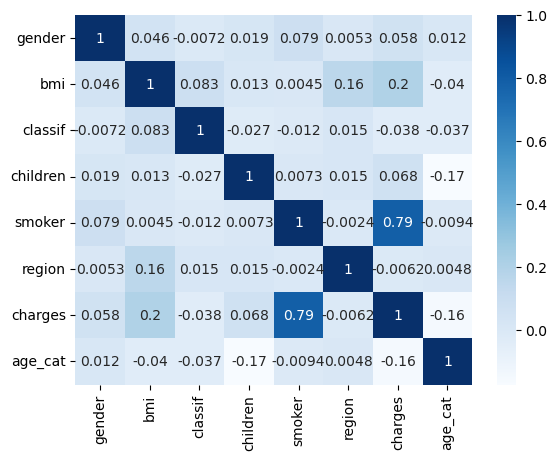

In [55]:
sns.heatmap(corr_mat1,annot=True,cmap="Blues")

In [56]:
# the data set have been scaled now ready for Modelling

In [57]:
# splliting the data set 

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X=ins_df.drop(['charges'],axis=1)
y=ins_df['charges']

In [60]:
scaled_X = StandardScaler().fit_transform(X)
scaled_X

array([[-1.00904996, -0.45390728,  1.28375918, ...,  1.96954839,
         1.34026953,  1.10173501],
       [ 0.99103121,  0.51109787, -0.69079882, ..., -0.50773061,
         0.43589313,  1.10173501],
       [ 0.99103121,  0.38451287, -0.69079882, ..., -0.50773061,
         0.43589313,  1.10173501],
       ...,
       [-1.00904996,  0.20696507, -0.69079882, ..., -0.50773061,
        -1.37285967,  1.10173501],
       [-1.00904996,  1.01743788, -0.03261282, ..., -0.50773061,
         0.43589313,  1.10173501],
       [-1.00904996, -0.7991391 ,  1.28375918, ..., -0.50773061,
         1.34026953,  1.10173501]])

In [61]:
X

,gender,bmi,classif,children,smoker,region,age_cat
0,0,27.90,4,0,1,3,2
1,1,33.77,1,1,0,2,2
2,1,33.00,1,3,0,2,2
4,1,28.88,4,0,0,1,2
5,0,25.74,4,0,0,2,2
...,...,...,...,...,...,...,...
1332,0,44.70,3,3,0,3,1
1333,1,30.97,1,3,0,1,1
1334,0,31.92,1,0,0,0,2
1335,0,36.85,2,0,0,2,2


In [106]:
X_train, X_test,y_train, y_test=train_test_split(scaled_X,y,test_size=0.3,random_state=42)

In [107]:
X_train.shape

(932, 7)

In [108]:
X_test.shape

(400, 7)

In [109]:
y_train.shape

(932,)

# Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [112]:
lr_model = LinearRegression().fit(X_train,y_train)

In [113]:
y_pred = lr_model.predict(X_test)

In [114]:
#y_pred

In [115]:
print("rmse :", mean_squared_error(y_test,y_pred,squared=False))
print("mae :", mean_absolute_error(y_test,y_pred))
print("mse :", mean_squared_error(y_test,y_pred))
print("MAP:" , mean_absolute_percentage_error(y_test,y_pred))
print("r2q: " , r2_score(y_test,y_pred))

rmse : 6835.407556963793
mae : 5111.125058647041
mse : 46722796.46979772
MAP: 0.5759885334654714
r2q:  0.6449322848870277


In [116]:
a=lr_model.score(X_train,y_train)

In [117]:
b=lr_model.score(X_test,y_test)

In [118]:
len(X_test)

400

In [119]:
len(y_pred)

400

In [120]:
len(X_train)

932

In [121]:
trainadscore= 1-(1-a)*(926-1)/(926-7-1)
testadscore= 1-(1-b)*(398-1)/(398-7-1)

In [122]:
print("adjusted r score for train :" , trainadscore )
print("adjusted r score for test :" , testadscore )

adjusted r score for train : 0.6939268377194521
adjusted r score for test : 0.6385592746157692


# Decision Tree 

In [125]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
# use grid search

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
kf=KFold(n_splits=5,random_state=42,shuffle=True)

In [128]:
dt=DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

In [129]:
param_grid={'min_samples_split':[3,5,7,9,10,40,80,100],
           'min_samples_leaf':[1,3,4,5,6,7,8,10,40,80,100],
           'max_depth':[3,4,5,6,7,8,9,10],
           'max_features':[2,3,4,5,6,7]}

In [130]:
gridcv=GridSearchCV(dt,param_grid,cv=kf)

In [131]:
gridcv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 3, 4, 5, 6, 7, 8, 10, 40, 80,
                                              100],
                         'min_samples_split': [3, 5, 7, 9, 10, 40, 80, 100]})

In [132]:
gridcv.best_score_

0.8549695318802406

In [133]:
gridcv.best_params_

{'max_depth': 4,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 3}

In [134]:
gridcv.best_estimator_

DecisionTreeRegressor(max_depth=4, max_features=5, min_samples_leaf=10,
                      min_samples_split=3, random_state=42)

In [135]:
dt_model=DecisionTreeRegressor(max_depth=4, max_features=5, min_samples_leaf=10,
                      min_samples_split=3, random_state=42).fit(X_train,y_train)
y_pred2=dt_model.predict(X_test)

In [136]:
print('Score Training: ',dt_model.score(X_train,y_train))
print('Score Test: ',dt_model.score(X_test,y_test))

Score Training:  0.8700768651402312
Score Test:  0.8210214082909377


In [137]:
print("rmse :", mean_squared_error(y_test,y_pred2,squared=False))
print("mae :", mean_absolute_error(y_test,y_pred2))
print("mse :", mean_squared_error(y_test,y_pred2))
print("MAP:" , mean_absolute_percentage_error(y_test,y_pred2))
print("r2q: " , r2_score(y_test,y_pred2))

rmse : 4852.989646240687
mae : 2847.026305643083
mse : 23551508.506519306
MAP: 0.2978763372138136
r2q:  0.8210214082909377


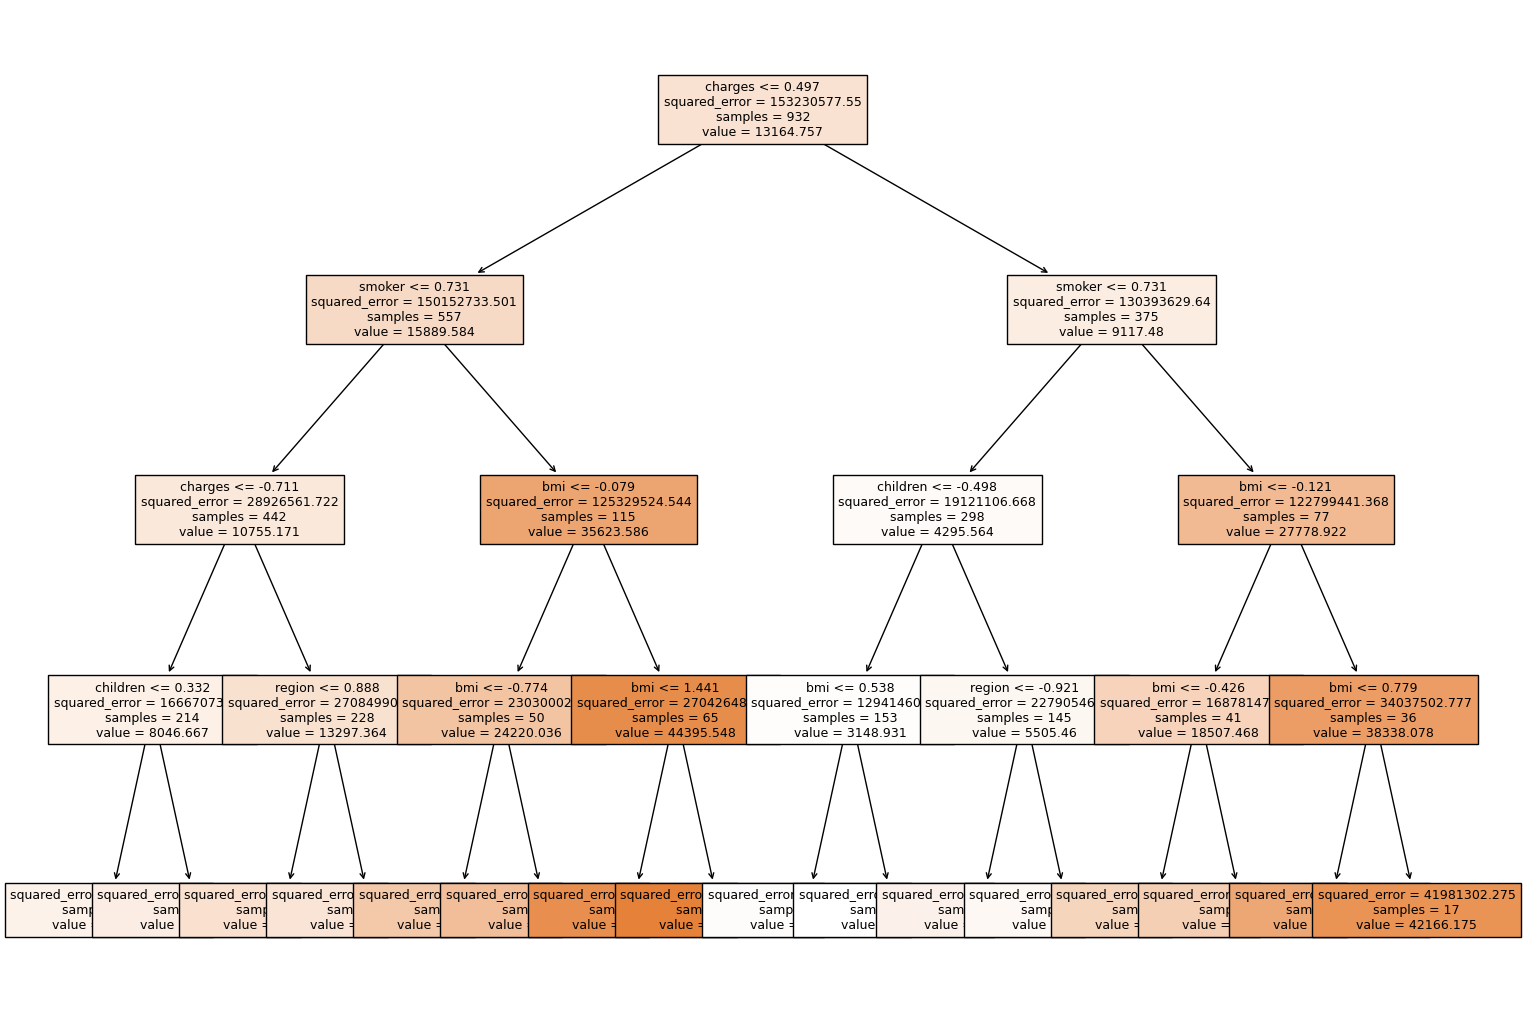

In [138]:
plt.figure(figsize=(18,13))
tree.plot_tree(dt_model,filled=True,feature_names=ins_df.columns,fontsize=9)
plt.show()

# Random Forest

In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [140]:
rf=RandomForestRegressor()

In [141]:
param_grid={"n_estimators":[10,20,40,50,70,100,150,200], #base learner
            "min_samples_split":[10,20,30], #sample size
            "min_samples_leaf":[20,40,100],
            "max_depth":[3,4,5,6,7,8,9,10]
}

In [142]:
grid_cv = GridSearchCV(rf,param_grid,cv=kf,scoring="r2")

In [143]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [10, 20, 40, 50, 70, 100, 150, 200]},
             scoring='r2')

In [144]:
grid_cv.best_score_

0.852338205498917

In [145]:
grid_cv.best_params_

{'max_depth': 4,
 'min_samples_leaf': 20,
 'min_samples_split': 30,
 'n_estimators': 10}

In [146]:
grid_cv.best_estimator_

RandomForestRegressor(max_depth=4, min_samples_leaf=20, min_samples_split=30,
                      n_estimators=10)

In [147]:
rm_model =RandomForestRegressor(max_depth=4, min_samples_leaf=20, min_samples_split=30,
                      n_estimators=10)

rm_model.fit(X,y)

RandomForestRegressor(max_depth=4, min_samples_leaf=20, min_samples_split=30,
                      n_estimators=10)

In [148]:
y_pred3= rm_model.predict(X_test)

In [149]:
print("rmse :", mean_squared_error(y_test,y_pred3,squared=False))
print("mae :", mean_absolute_error(y_test,y_pred3))
print("mse :", mean_squared_error(y_test,y_pred3))
print("MAP:" , mean_absolute_percentage_error(y_test,y_pred3))
print("r2q: " , r2_score(y_test,y_pred3))

rmse : 9036.341253010987
mae : 6794.517884967586
mse : 81655463.24086818
MAP: 1.174087197470155
r2q:  0.3794631111567135


In [150]:
rm_model.score(X_test,y_test)

0.3794631111567135

In [151]:
rm_model.score(X_train,y_train)

0.37785484843559614

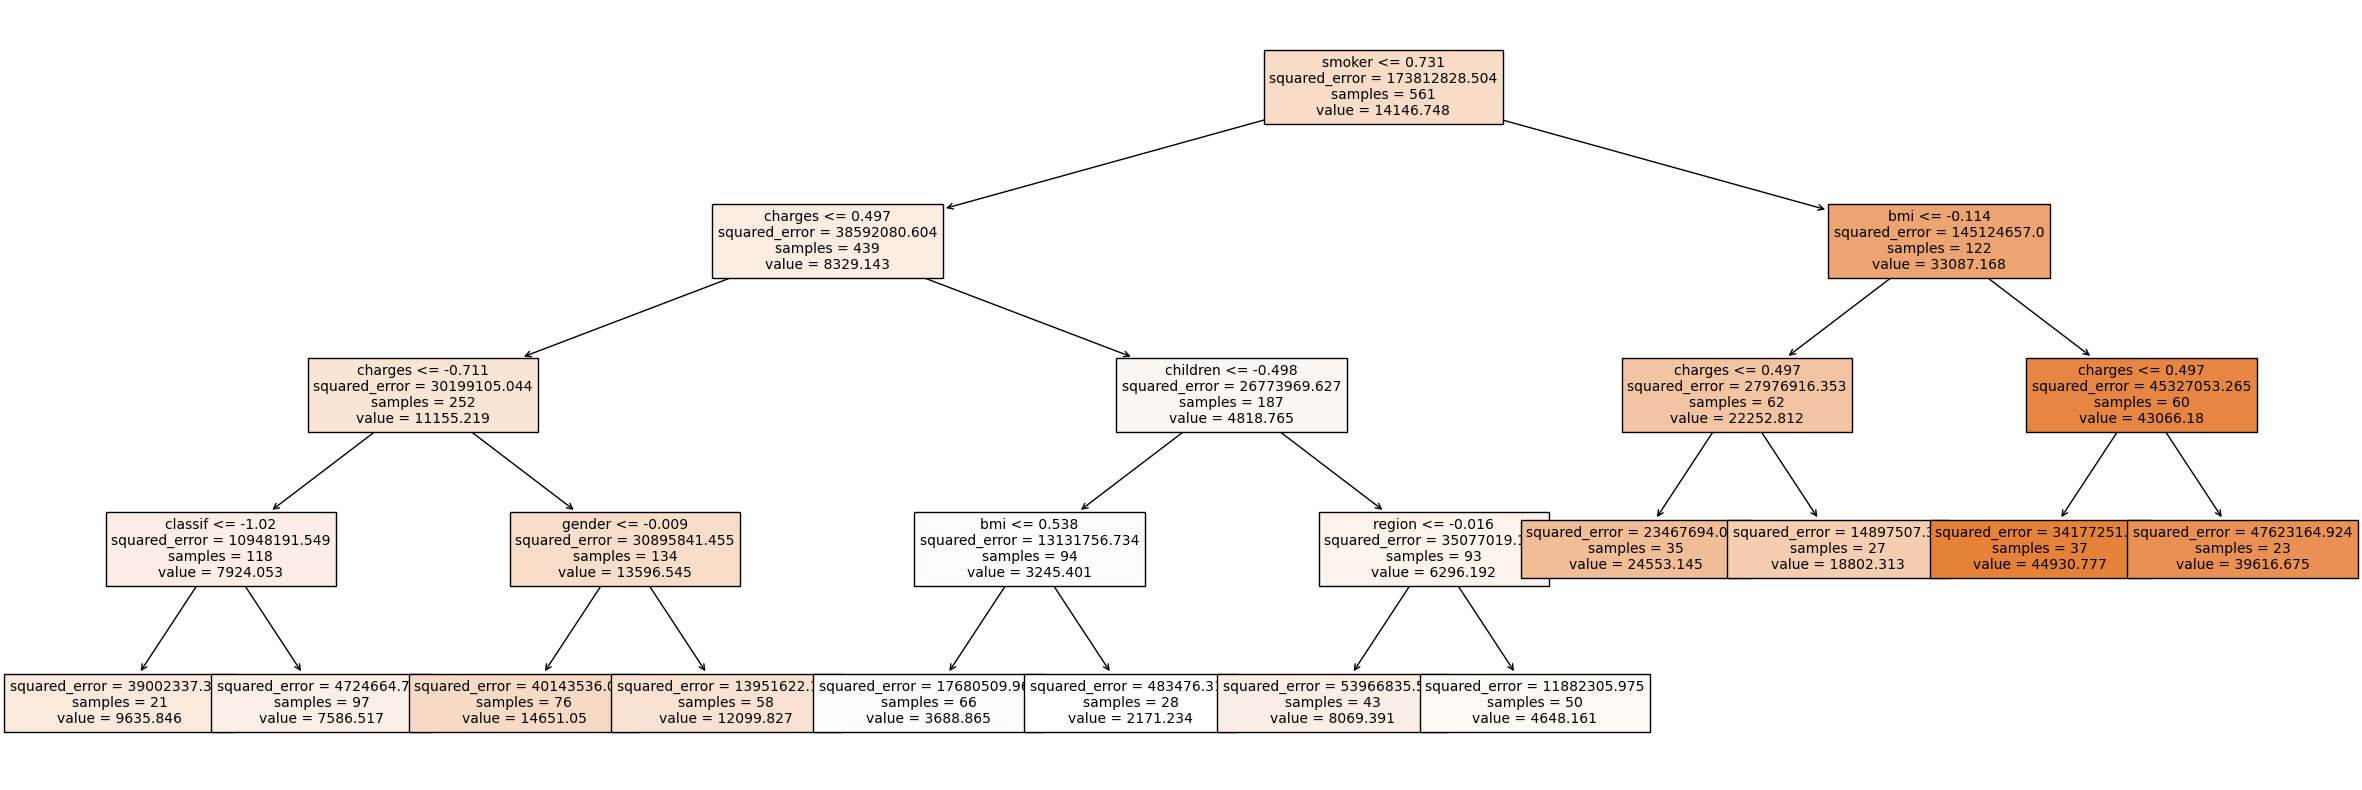

In [152]:
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(grid_cv.best_estimator_[0],feature_names=ins_df.columns,class_names=True,filled=True,fontsize=10)
plt.show()

# KNN

In [153]:
X.shape

(1332, 7)

In [154]:
y.shape

(1332,)

In [155]:
from sklearn.neighbors import KNeighborsRegressor

In [156]:
score1=[]
for i in range(20,40):
    score=cross_val_score(KNeighborsRegressor(i),X,y,cv=kf,scoring='r2')
    print(f'{i} : ',np.mean(score))
    score1.append(np.mean(score))

20 :  0.2658088699630584
21 :  0.25932230790525007
22 :  0.25541789554357425
23 :  0.24982540023585748
24 :  0.24449900568645483
25 :  0.24329403818014955
26 :  0.24246646958985937
27 :  0.23923384485152566
28 :  0.23633416440138744
29 :  0.23162291927374792
30 :  0.22859651407875486
31 :  0.22352700724590094
32 :  0.219425003217806
33 :  0.2176402043228342
34 :  0.21602157552381493
35 :  0.2125293051703841
36 :  0.20855222966886328
37 :  0.2034599868224843
38 :  0.20035347857621827
39 :  0.19774581312979722


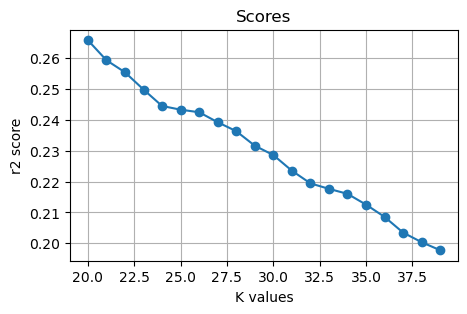

In [157]:
plt.figure(figsize=(5,3))
plt.plot(range(20,40),score1,marker='o')
plt.xlabel('K values')
plt.ylabel('r2 score')
plt.title("Scores")
plt.grid()
plt.show()

In [158]:
k=20
k_model = KNeighborsRegressor(k).fit(X_train,y_train)
y_predk = k_model.predict(X_test)

In [159]:
print("Training score:", k_model.score(X_train,y_train))

Training score: 0.8223311570662911


In [160]:
print("Testing score:", k_model.score(X_test,y_test))

Testing score: 0.7728760832026288


In [161]:
print("rmse :", mean_squared_error(y_test,y_predk,squared=False))
print("mae :", mean_absolute_error(y_test,y_predk))
print("mse :", mean_squared_error(y_test,y_predk))
print("MAP:" , mean_absolute_percentage_error(y_test,y_predk))
print("r2q: " , r2_score(y_test,y_predk))

rmse : 5466.888999923489
mae : 3760.49436385
mse : 29886875.33748445
MAP: 0.45328993230923387
r2q:  0.7728760832026288


# Stacking

In [162]:
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [163]:
level1=[]
level1.append(('lr',LinearRegression()))
level1.append(('KNN',KNeighborsRegressor()))
level1.append(('SVM',SVR()))
level1.append(('DT',DecisionTreeRegressor(max_depth=3, max_features=2, min_samples_leaf=4,
                      min_samples_split=3, random_state=42)))
level1.append(('RF',RandomForestRegressor(max_depth=5, min_samples_leaf=20, min_samples_split=10,
                      n_estimators=40)))
level2=LinearRegression()
stac_model=StackingRegressor(estimators=level1,final_estimator=level2,cv=kf)

In [164]:
level1

[('lr', LinearRegression()),
 ('KNN', KNeighborsRegressor()),
 ('SVM', SVR()),
 ('DT',
  DecisionTreeRegressor(max_depth=4, max_features=7, min_samples_leaf=5,
                        min_samples_split=40, random_state=42)),
 ('RF',
  RandomForestRegressor(max_depth=5, min_samples_leaf=20, min_samples_split=10,
                        n_estimators=40))]

In [165]:
s_model=stac_model.fit(X_train,y_train)
y_pred6=s_model.predict(X_test)

In [166]:
print('Score Training: ',s_model.score(X_train,y_train))
print('Score Test: ',s_model.score(X_test,y_test))

Score Training:  0.870765873828467
Score Test:  0.8239182909568379


In [167]:
print("rmse :", mean_squared_error(y_test,y_pred6,squared=False))
print("mae :", mean_absolute_error(y_test,y_pred6))
print("mse :", mean_squared_error(y_test,y_pred6))
print("MAP:" , mean_absolute_percentage_error(y_test,y_pred6))
print("r2q: " , r2_score(y_test,y_pred6))

rmse : 4813.5550603818965
mae : 2768.9113585917526
mse : 23170312.31932816
MAP: 0.28988859823378627
r2q:  0.8239182909568379


# Boosting AdaBoost

In [168]:
from sklearn.ensemble import AdaBoostRegressor

In [169]:
ada=AdaBoostRegressor()

In [170]:
ad = AdaBoostRegressor(n_estimators=i,learning_rate=0.5)

In [171]:
param_grid = {
    'n_estimators': [10,20,30,40,50, 100], 
    'learning_rate': [0.01, 0.1,0.5, 1.0],  
}

In [172]:
grid_cv1 = GridSearchCV(ad,param_grid,cv=kf,scoring="r2")

In [173]:
grid_cv1.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostRegressor(learning_rate=0.5, n_estimators=39),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [10, 20, 30, 40, 50, 100]},
             scoring='r2')

In [174]:
grid_cv1.best_score_

0.8509497171575389

In [175]:
grid_cv1.best_params_

{'learning_rate': 0.01, 'n_estimators': 20}

In [176]:
grid_cv1.best_estimator_

AdaBoostRegressor(learning_rate=0.01, n_estimators=20)

In [177]:
admodel = AdaBoostRegressor(learning_rate=0.5, n_estimators=3,random_state=2)

admodel.fit(X,y)

AdaBoostRegressor(learning_rate=0.5, n_estimators=3, random_state=2)

In [178]:
ad_model=admodel.fit(X_train,y_train)
y_pred5=admodel.predict(X_test)

In [179]:
ad_model.score(X_test,y_test)

0.8194737547666476

In [180]:
ad_model.score(X_train,y_train)

0.8568981605957298

In [181]:
print("rmse",mean_squared_error(y_test, y_pred5, squared=False))
print("r2:",r2_score(y_test,y_pred5))
print("Mae:", mean_absolute_error(y_test, y_pred5))
print("MAP:" , mean_absolute_percentage_error(y_test,y_pred5))

rmse 4873.926730546584
r2: 0.8194737547666476
Mae: 3163.500405257111
MAP: 0.3550887678768085


**After comparison with all the Regression Models , found that Stacking performs the best.**

In [6]:
my_dict = {'Name':['Arjun','Ram','Hanuman','Sita'],
           'Age':[66,77,88,99]}

df=pd.DataFrame(my_dict)

df

,Name,Age
0,Arjun,66
1,Ram,77
2,Hanuman,88
3,Sita,99
